In [156]:
%config IPCompleter.greedy=True


# A. An introduction to machine learning with scikitlearn

## A.1 Librairies

In [157]:
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
iris = datasets.load_iris ()
X = iris.data # Data
Y = iris.target

In [159]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [160]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

_4. Print the number of data, names of variables and the name of classes._

In [161]:
# using pandas to have an easier understanding of the dataset
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [162]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

## A.2 Data normalization

### 3. PCA on dataset

In [163]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)
plt.show()

### 4. KMean Clustering on regular dataset

In [164]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=3)
cl.fit(X)

y_kmeans = cl.predict(X)

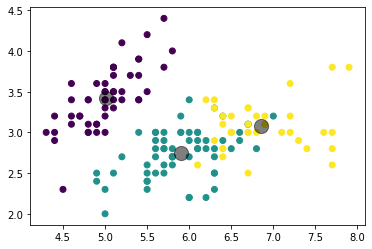

In [165]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = cl.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


While repeating the partitions do not seem to change.

### 5. KMean Clustering on PCA dataset

In [166]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=3)
cl.fit(X_pca)

y_kmeans = cl.predict(X_pca)

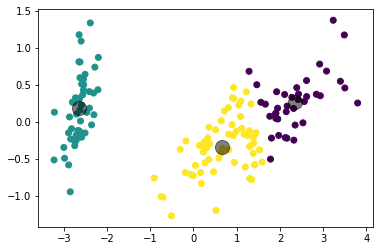

In [167]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = cl.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 6. Plotting With Real Labels 

_Plotting With Real Labels on PCA Dataset_

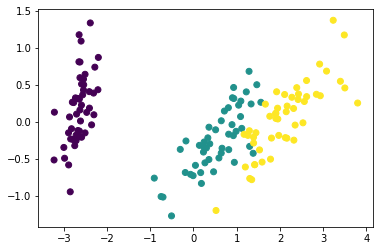

In [168]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')


### 6. Plotting With Real Labels on regular Dataset

_Plotting With Real Labels on regular Dataset_

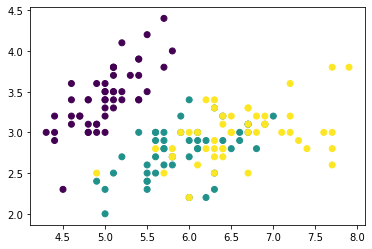

In [169]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

We can see that projected data gives clearer clusters groups (the data points are not mixed up and are in distinct cluster). Hower PCA reduces dimensions and dataset used from the PCA could underfit the model meaning that the model can not take into account complex phoenomenums. On the other hand, working with fewer dimensions is less ressource intensive.

Regular data being used in the the clustering KMeans are more spread out and the clusters are less dense. The clusters found out by the KMean are often overlapping when being visualized. Data with more dimensions is harder to clusterize and may seem not as useful. But in fact, more dimensions (with large data sets) can enable us to predict and model more complex phenomenums.

# B. An introduction to machine learning with scikitlearn

### Data Preparation

_Spliting Data set into train and test_

In [190]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size=0.3)

_Normalizing data for the KNN_

In [191]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

_vizualizing training set_

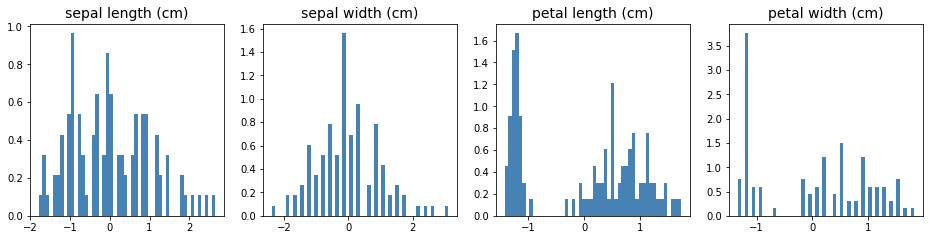

In [192]:
fig = plt.figure(figsize=(16, 12))

for feat_idx in range(x_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(x_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(iris_df.columns[feat_idx], fontsize=14)

### Model Training

### Using K neighbor = 1

In [193]:
from sklearn import neighbors, metrics

knn = neighbors.KNeighborsClassifier(1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [194]:
y_predict = knn.predict(x_test)


metrics.accuracy_score(y_test, y_predict)

0.9777777777777777

### Using K neighbor = 4

In [204]:
from sklearn import neighbors, metrics

knn_2 = neighbors.KNeighborsClassifier(5)
knn_2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [205]:
y_predict = knn_2.predict(x_test)


metrics.accuracy_score(y_test, y_predict)

0.9555555555555556

The result vary using a different K. The Model keeps in memory previous data points and determines the class of the row by finding the k (1 or 4 in this case) Neighbors.

### BONUS : finding the best K 

In [212]:
param_grid = {"n_neighbors": [1,3,5,7,9,11,13,15]}

score = 'accuracy'

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid, # hyperparameters to test
    cv=5, # folds for cross validation (5 or 10 generally)
    scoring=score # score to optimize
)

# optimize the classifier on the training set
clf.fit(x_train_std, y_train)

print("Best Hyperparameters on training test")
print(clf.best_params_)

print("Cross validation results")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], 
        clf.cv_results_['std_test_score'],  
        clf.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ))

Best Hyperparameters on training test
{'n_neighbors': 7}
Cross validation results
accuracy = 0.943 (+/-0.035) for {'n_neighbors': 1}
accuracy = 0.943 (+/-0.092) for {'n_neighbors': 3}
accuracy = 0.943 (+/-0.092) for {'n_neighbors': 5}
accuracy = 0.952 (+/-0.085) for {'n_neighbors': 7}
accuracy = 0.943 (+/-0.109) for {'n_neighbors': 9}
accuracy = 0.933 (+/-0.129) for {'n_neighbors': 11}
accuracy = 0.905 (+/-0.136) for {'n_neighbors': 13}
accuracy = 0.905 (+/-0.136) for {'n_neighbors': 15}


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [213]:
y_pred = clf.predict(x_test_std)

print("On test dataset, accurency: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

On test dataset, accurency: 0.956


# C. Naive Bayesian classifier

### 2. Skilearn Classifier

In [234]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size=0.3)

In [235]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [236]:
y_pred = clf.predict(x_test)

In [237]:
"On test dataset, accurency: {:.3f}".format(metrics.accuracy_score(y_test, y_pred))

'On test dataset, accurency: 0.933'